In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")

In [52]:
df = pd.read_csv("Combined_Jobs_Final.csv")
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (84090, 23)


,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,...,Industry,Job.Description,Requirements,Salary,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
0,111,1,open,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,California,CA,...,Food and Beverages,Tacolicious' first Palo Alto store just opened...,NaN,8.00,NaN,NaN,Part-Time,NaN,2013-03-12 02:08:28 UTC,2014-08-16 15:35:36 UTC
1,113,1,open,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,California,CA,...,Food and Beverages,\r\n\r\nNew French Brasserie in S.F. Financia...,NaN,0.00,NaN,NaN,Part-Time,NaN,2013-04-12 08:36:36 UTC,2014-08-16 15:35:36 UTC
2,117,1,open,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,California,CA,...,Food and Beverages,We are a popular Mediterranean wine bar and re...,NaN,11.00,NaN,NaN,Part-Time,NaN,2013-07-16 09:34:10 UTC,2014-08-16 15:35:37 UTC
3,121,1,open,brisbane-ca-teriyaki-house-server,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,California,CA,...,Food and Beverages,● Serve food/drinks to customers in a profess...,NaN,10.55,NaN,NaN,Part-Time,NaN,2013-09-04 15:40:30 UTC,2014-08-16 15:35:38 UTC
4,127,1,open,los-angeles-ca-rosa-mexicano-sunset-kitchen-st...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,CA,...,Food and Beverages,"Located at the heart of Hollywood, we are one ...",NaN,10.55,NaN,NaN,Part-Time,NaN,2013-07-17 15:26:18 UTC,2014-08-16 15:35:40 UTC


In [53]:
# Drop rows with missing descriptions
df = df[df['Job.Description'].notnull()].copy()
df.reset_index(drop=True, inplace=True)

# Fill missing values
df['Title'] = df['Title'].fillna("Unknown Title")
df['Company'] = df['Company'].fillna("Unknown Company")
df['City'] = df['City'].fillna("Unknown City")
df['State.Name'] = df['State.Name'].fillna("Unknown State")

# Drop duplicates
df.drop_duplicates(subset=['Title', 'Job.Description'], inplace=True)

# Combine relevant text fields
df['Combined'] = df['Title'] + " " + df['Job.Description']

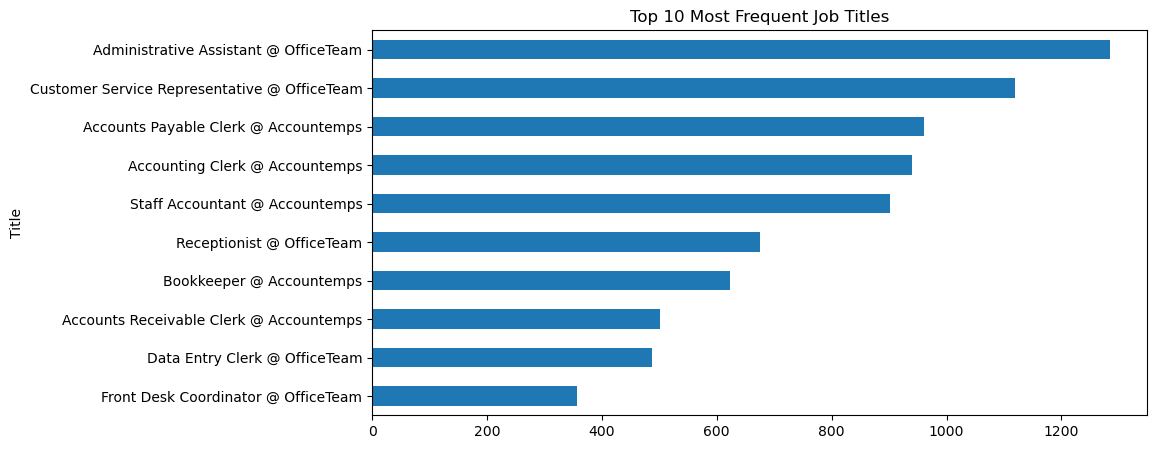

In [54]:
plt.figure(figsize=(10,5))
df['Title'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Most Frequent Job Titles")
plt.gca().invert_yaxis()
plt.show()

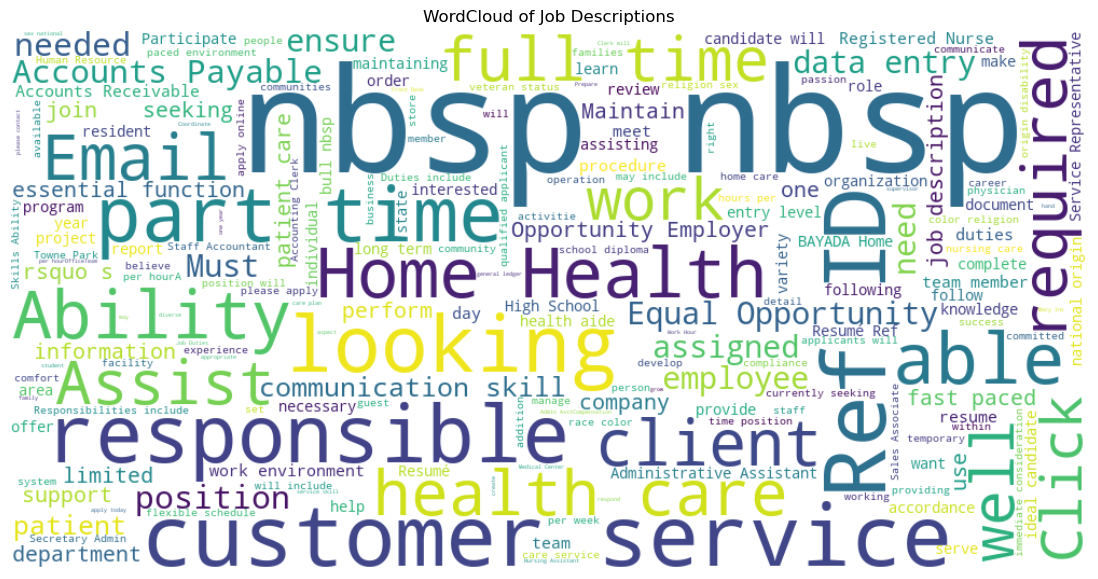

In [60]:
text = " ".join(df['Job.Description'].dropna().values)
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Job Descriptions")
plt.show()

In [61]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['Combined'])

In [62]:
def recommend_jobs(user_input, top_n=5):
    user_vector = vectorizer.transform([user_input])
    similarity_scores = cosine_similarity(user_vector, tfidf_matrix).flatten()
    indices = similarity_scores.argsort()[::-1][:top_n]

    recommendations = df.iloc[indices][['Title', 'Company', 'City', 'State.Name', 'Job.Description']]
    return recommendations

In [63]:
user_input = "Python, Machine Learning, SQL, Data Analysis"
recommendations = recommend_jobs(user_input)

# Display
for idx, row in recommendations.iterrows():
    print(f"\nTitle: {row['Title']}")
    print(f"Company: {row['Company']}")
    print(f"Location: {row['City']}, {row['State.Name']}")
    print(f"Description Preview: {row['Job.Description'][:300]}...")
    print("="*80)


Title: SQL Application Support Analyst @ Open Systems Technologies - TN
Company: Open Systems Technologies - TN
Location: Austin, Texas
Description Preview: Open Systems Technologies is seeking a SQL developer within an application support environment with our direct client in the Austin TX area. This person will work in an environment that supports a 3rd party application but is not expected to already have this niche application experience. They will ...

Title: Business Analyst @ Accountemps
Company: Accountemps
Location: Hayden, Idaho
Description Preview: Ref ID:03650-110000Classification:Fin. Systems Conversion SpecialistCompensation:$28.50 to $33.00 per hourA Hayden manufacturing company is looking for a SQL Data and Business Analyst. The SQL Data and Business Analyst works collaboratively with the Accounting department. The main responsibility of ...

Title: Intern - Database Developer Support @ Storeroom Solutions
Company: Storeroom Solutions
Location: Radnor, Pennsylvania
Des

In [64]:
recommendations.to_csv("Job_Recommendations.csv", index=False)